In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

Epoch [1/10], Loss: 0.0082
Epoch [2/10], Loss: 0.0045
Epoch [3/10], Loss: 0.0023
Epoch [4/10], Loss: 0.0015
Epoch [5/10], Loss: 0.0014
Epoch [6/10], Loss: 0.0015
Epoch [7/10], Loss: 0.0015
Epoch [8/10], Loss: 0.0014
Epoch [9/10], Loss: 0.0010
Epoch [10/10], Loss: 0.0007


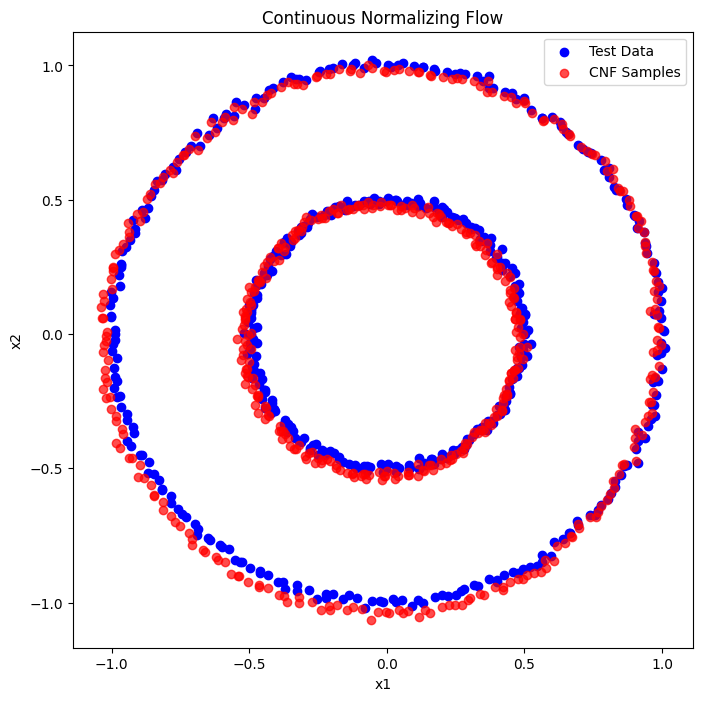

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

class CNF(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, z):
        return self.net(z)
# this is a new function
def compute_loss(z_t, target):
    #return torch.mean(torch.square(z_t - target))
    return nn.CrossEnropyLoss

def train_cnf(model, optimizer, num_epochs, device):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()

        # Generate dataset
        num_samples = 1000
        x, _ = make_circles(n_samples=num_samples, noise=0.01, factor=0.5)
        x = torch.tensor(x).float().to(device)

        # Set up time points
        t0, t1 = 0, 1
        num_timesteps = 50
        t = torch.linspace(t0, t1, num_timesteps).float().to(device)

        # Solve ODE using the adjoint method
        z0 = x.clone().to(device)
        z_t = odeint_adjoint(model, z0, t)

        # Compute loss
        target = x.clone().detach().requires_grad_(True)
        loss = compute_loss(z_t[-1], target)

        # Backpropagation with the adjoint method
        loss.backward()
        optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

def odeint_adjoint(func, z0, t):
    z_t = [z0]
    for i in range(1, len(t)):
        z_prev = z_t[-1]
        dt = t[i] - t[i-1]
        dzdt = func(z_prev)
        z_next = z_prev + dzdt * dt
        z_t.append(z_next)
    return torch.stack(z_t)

def plot_results(model, device):
    model.eval()

    # Generate test data
    num_test_samples = 500
    test_data, _ = make_circles(n_samples=num_test_samples, noise=0.01, factor=0.5)
    test_data = torch.tensor(test_data).float().to(device)

    # Set up time points
    t0, t1 = 0, 1
    num_timesteps = 50
    t = torch.linspace(t0, t1, num_timesteps).float().to(device)

    # Solve ODE using the adjoint method
    z0 = test_data.clone().to(device)
    z_t = odeint_adjoint(model, z0, t)

    # Plot the results
    plt.figure(figsize=(8, 8))
    plt.scatter(test_data[:, 0].cpu().numpy(), test_data[:, 1].cpu().numpy(), color='blue', label='Test Data')
    plt.scatter(z_t[-1][:, 0].cpu().detach().numpy(), z_t[-1][:, 1].cpu().detach().numpy(), color='red', alpha=0.7, label='CNF Samples')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Continuous Normalizing Flow')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = CNF().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_cnf(model, optimizer, num_epochs=10, device=device)
    plot_results(model, device)


Epoch [1/10], Loss: 0.0214
Epoch [2/10], Loss: 0.0144
Epoch [3/10], Loss: 0.0093
Epoch [4/10], Loss: 0.0060
Epoch [5/10], Loss: 0.0042
Epoch [6/10], Loss: 0.0036
Epoch [7/10], Loss: 0.0034
Epoch [8/10], Loss: 0.0035
Epoch [9/10], Loss: 0.0035
Epoch [10/10], Loss: 0.0032


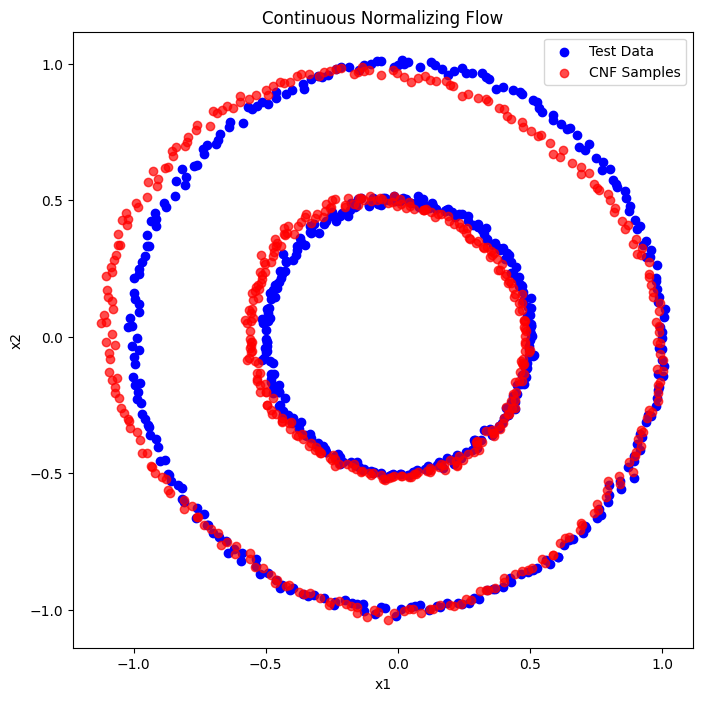

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

class CNF(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, z):
        return self.net(z)

def compute_loss(z_t, target):
    return torch.mean(torch.square(z_t - target))

def train_cnf(model, optimizer, num_epochs, device):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()

        # Generate dataset
        num_samples = 1000
        x, _ = make_circles(n_samples=num_samples, noise=0.01, factor=0.5)
        x = torch.tensor(x).float().to(device)

        # Set up time points
        t0, t1 = 0, 1
        num_timesteps = 50
        t = torch.linspace(t0, t1, num_timesteps).float().to(device)

        # Solve ODE using the adjoint method
        z0 = x.clone().to(device)
        z_t = odeint_adjoint(model, z0, t)

        # Compute loss
        target = x.clone().detach().requires_grad_(True)
        loss = compute_loss(z_t[-1], target)

        # Backpropagation with the adjoint method
        loss.backward()
        optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

def odeint_adjoint(func, z0, t):
    z_t = [z0]
    for i in range(1, len(t)):
        z_prev = z_t[-1]
        dt = t[i] - t[i-1]
        dzdt = func(z_prev)
        z_next = z_prev + dzdt * dt
        z_t.append(z_next)
    return torch.stack(z_t)

def plot_results(model, device):
    model.eval()

    # Generate test data
    num_test_samples = 500
    test_data, _ = make_circles(n_samples=num_test_samples, noise=0.01, factor=0.5)
    test_data = torch.tensor(test_data).float().to(device)

    # Set up time points
    t0, t1 = 0, 1
    num_timesteps = 50
    t = torch.linspace(t0, t1, num_timesteps).float().to(device)

    # Solve ODE using the adjoint method
    z0 = test_data.clone().to(device)
    z_t = odeint_adjoint(model, z0, t)

    # Plot the results
    plt.figure(figsize=(8, 8))
    plt.scatter(test_data[:, 0].cpu().numpy(), test_data[:, 1].cpu().numpy(), color='blue', label='Test Data')
    plt.scatter(z_t[-1][:, 0].cpu().detach().numpy(), z_t[-1][:, 1].cpu().detach().numpy(), color='red', alpha=0.7, label='CNF Samples')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Continuous Normalizing Flow')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = CNF().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_cnf(model, optimizer, num_epochs=10, device=device)
    plot_results(model, device)


Epoch [1/5], Loss: -0.3327
Epoch [2/5], Loss: -0.3442
Epoch [3/5], Loss: -0.3557
Epoch [4/5], Loss: -0.3672
Epoch [5/5], Loss: -0.3799


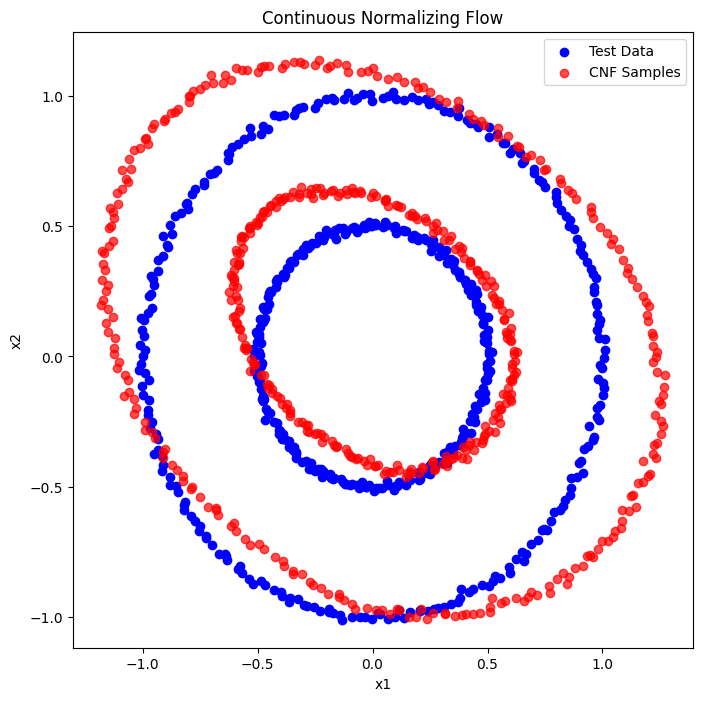

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

class CNF(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, z):
        return self.net(z)

def compute_loss(z_t, target):
    criterion = nn.CrossEntropyLoss()
    return criterion(z_t, target)

def train_cnf(model, optimizer, num_epochs, device):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()

        # Generate dataset
        num_samples = 1000
        x, _ = make_circles(n_samples=num_samples, noise=0.01, factor=0.5)
        x = torch.tensor(x).float().to(device)

        # Set up time points
        t0, t1 = 0, 1
        num_timesteps = 50
        t = torch.linspace(t0, t1, num_timesteps).float().to(device)

        # Solve ODE using the adjoint method
        z0 = x.clone().to(device)
        z_t = odeint_adjoint(model, z0, t)

        # Compute loss
        target = x.clone().detach().requires_grad_(True)
        loss = compute_loss(z_t[-1], target)

        # Backpropagation with the adjoint method
        loss.backward()
        optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

def odeint_adjoint(func, z0, t):
    z_t = [z0]
    for i in range(1, len(t)):
        z_prev = z_t[-1]
        dt = t[i] - t[i-1]
        dzdt = func(z_prev)
        z_next = z_prev + dzdt * dt
        z_t.append(z_next)
    return torch.stack(z_t)

def plot_results(model, device):
    model.eval()

    # Generate test data
    num_test_samples = 500
    test_data, _ = make_circles(n_samples=num_test_samples, noise=0.01, factor=0.5)
    test_data = torch.tensor(test_data).float().to(device)

    # Set up time points
    t0, t1 = 0, 1
    num_timesteps = 50
    t = torch.linspace(t0, t1, num_timesteps).float().to(device)

    # Solve ODE using the adjoint method
    z0 = test_data.clone().to(device)
    z_t = odeint_adjoint(model, z0, t)

    # Plot the results
    plt.figure(figsize=(8, 8))
    plt.scatter(test_data[:, 0].cpu().numpy(), test_data[:, 1].cpu().numpy(), color='blue', label='Test Data')
    plt.scatter(z_t[-1][:, 0].cpu().detach().numpy(), z_t[-1][:, 1].cpu().detach().numpy(), color='red', alpha=0.7, label='CNF Samples')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Continuous Normalizing Flow')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = CNF().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_cnf(model, optimizer, num_epochs=5, device=device)
    plot_results(model, device)


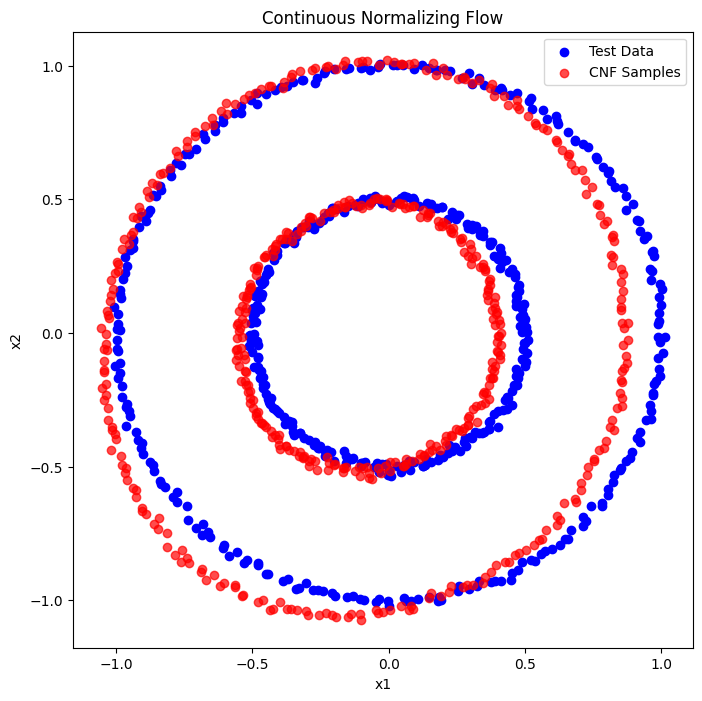

In [ ]:
import torch # PyTorch library for building/training neural networks
import torch.nn as nn # neural networks from torch
#scyktlearn - use make_circles - start with blob and go to rings
from sklearn.datasets import make_circles # generate dataset of concentric circles
import matplotlib.pyplot as plt # library to plot figures

class CNF(nn.Module):   # Continuous Normalizing Flow Model: type of neural network architecture
# class definition developed with help from PyTorch tutorials and documentation
    def __init__(self):
        super().__init__()  ##MAKE THIS CONTINUOUS TIME
        self.net = nn.Sequential( # set up sequential layers, each layer has a linear transformation and then an activation function (non-linear)
            nn.Linear(2, 64), # linear transformation, input data is dimension 2
            nn.ReLU(),  # use ReLU as activation function
            nn.Linear(64, 64),
            nn.ReLU(),  # use ReLU as activation function
            nn.Linear(64, 2) # output data is dimension 2
        )

    def forward(self, z): # a required function in PyTorch models
        # consists of a forward pass of the NN
        # take an input tensor (z = data to be transformed)
        return self.net(z)  # passes tensor through self.net as defined above for transformation of data
        # this output is used to compute the loss and is needed for the optimization


## UPDATE LOSS FUNCTION
def compute_loss(z_t, target):  # this is our loss function for the optimization problem
# inputs to the compute_loss function are the transformed data (z_t) and the ground truth values (target)
    return torch.mean(torch.square(z_t - target)) # the loss is computed using mean squared error or the L2 loss between z_t and target
    # an alternative could be nn.CrossEntropyLoss() for a cost function
    # however, I found the cross entropy loss function didn't work as well


def train_cnf(model, optimizer, num_epochs, device):  # use this function to train the model
    # use backpropagation and adjoint method
    model.train()
    for epoch in range(num_epochs): # start training loop for number of epochs
        optimizer.zero_grad() # reset all gradients to zero

        # Generate the training dataset using make_circles
        num_samples = 1000
        x, _ = make_circles(n_samples=num_samples, noise=0.01, factor=0.5) # noise and factor have been selected arbitrarily
        x = torch.tensor(x).float().to(device)

        # Set up time scale for training
        t0 = 0
        t1 = 1
        tsteps = 50
        t = torch.linspace(t0, t1, tsteps).float().to(device) # create linspace from defined timescale

        # Solve ODE using the adjoint method function provided below
        z0 = x.clone().to(device)
        z_t = adjoint_method(model, z0, t)  # get the transformed data

        # Compute loss between transformed data (z_t) and target data (target)
        target = x.clone().detach().requires_grad_(True)
        loss = compute_loss(z_t[-1], target)

        # Backpropagation with the adjoint method
        loss.backward() # do backpropagation to get gradients
        optimizer.step()  # update the parameters using step

#def adjoint_method(func,z0,t):
#    t0 = t[0]
#    t1 = t[-1]
#    h = (t1 - t0) / (len(t) - 1)
#    z = z0
#    z.requires_grad_(True)
#    for i in range (len(t) - 1):
#        dzdt = func(z)
#        z_grad = torch.autograd.grad(dzdt,z, grad_outputs = torch.ones_like(dzdt), create_graph=True)[0]
#        z = z + h*z_grad
#    return z
    # adjoint method is our integration method along with forward (can change to back propagation)
    # check what the loss is?

def adjoint_method(func, z0, t):  # solve ode using adjoint method
# func: function describing dynamics
# z0: initial state
# t: time
    z_t = [z0]  # set up z_t to store values, start with initial point z0
    for i in range(1, len(t)):  # this is the integration loop
        z_prev = z_t[-1]  # set the previous step to be the last step of the z_t vector
        dt = t[i] - t[i-1]  # set up the time step manually
        dzdt = func(z_prev) # calculate the derivative
        z_next = z_prev + dzdt * dt # update the step with the typical x + dt*dx
        z_t.append(z_next) # add the current value to the end of the z_t list
    return torch.stack(z_t) # return the whole z_t stack of values which consists of a state for each time point

def plot_results(model, device):  # plot the results of the model, ode solver, etc.
# inputs: model is the trained CNF model, and device is the device that has the computations
    model.eval()  # evaluate the model

    # Generate test data
    num_test_samples = 500  # number selected arbitarily
    test_data, _ = make_circles(n_samples=num_test_samples, noise=0.01, factor=0.5) # use make_circles and arbitrary noise and factor values
    test_data = torch.tensor(test_data).float().to(device)  # format the test_data

    # Set up time points
    t0 = 0
    t1 = 1
    num_timesteps = 50
    t = torch.linspace(t0, t1, num_timesteps).float().to(device)

    # Solve ODE using the adjoint method
    z0 = test_data.clone().to(device)
    z_t = adjoint_method(model, z0, t)

    # Plot the results
    plt.figure(figsize=(8, 8))
    plt.scatter(test_data[:, 0].cpu().numpy(), test_data[:, 1].cpu().numpy(), color='blue', label='Test Data')  # plot test data
    plt.scatter(z_t[-1][:, 0].cpu().detach().numpy(), z_t[-1][:, 1].cpu().detach().numpy(), color='red', alpha=0.7, label='CNF Samples')  # plot CNF samples or train data
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Continuous Normalizing Flow')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu') # set up device
    model = CNF().to(device)  # define model
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum = 0.1)  # define optimizer using one of PyTorch's optimizers (from tutorial)
    train_cnf(model, optimizer, num_epochs=10, device=device) # train the model
    plot_results(model, device) # plot the results
